<img src = "https://github.com/HarryVargas96/UdeCataluna/blob/main/logo_uc_grande.png?raw=true" alt = "Encabezado" width = "100%">  </img>

# Taller guiado de unión de datos

Este taller busca que el estudiante aprenda a usar los diferentes métodos y uniones para consolidar datasets.

### 1. Importamos nuestras librerías

In [ ]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

### 2. Extraemos los datos
* Vamos a tener unos pasos adicionales a la extracción en los que transformamos el dataset para que podamos cumplicar con el propósito del taller.

In [ ]:
# Download latest version
# path = kagglehub.dataset_download("tunguz/online-retail")

# print("Path to dataset files:", path)

100%|██████████| 7.13M/7.13M [00:00<00:00, 74.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/tunguz/online-retail/versions/1


In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/static/public/352/data.csv')

# df = pd.read_csv('Online_Retail.csv', encoding='latin1')
df = df[~df['InvoiceNo'].str.lower().str.startswith('c')]

* Construimos 3 dataframes a partir del original

In [ ]:
df_invoice = df[['InvoiceNo', 'Country']].drop_duplicates()
df_invoice.head(2)

,InvoiceNo,Country
0,536365,United Kingdom
7,536366,United Kingdom


In [ ]:
df_stock_code = df[['InvoiceNo', 'StockCode','Quantity', 'UnitPrice']].drop_duplicates()
df_stock_code.head()

,InvoiceNo,StockCode,Quantity,UnitPrice
0,536365,85123A,6,2.55
1,536365,71053,6,3.39
2,536365,84406B,8,2.75
3,536365,84029G,6,3.39
4,536365,84029E,6,3.39


In [ ]:
df_stock_description = df[['StockCode', 'Description']].drop_duplicates()
df_stock_description.head(2)

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN


### 3. Descripción de las tablas

* df_invoice

variable |  rol | descripcion
---|---|---
InvoiceNo | Identificador | Número de 6 dígitos asignado como identificador único a cada transacción. Si el código comienza con una 'c', indica que la transacción fue cancelada
Country | variable | Nombre del país en el que vive el consumidor

* df_stock_code

variable |  rol | descripcion
---|---|---
InvoiceNo | Identificador | Número de 6 dígitos asignado como identificador único a cada transacción. Si el código comienza con una 'c', indica que la transacción fue cancelada
StockCode | Identificador | Número de 5 dígitos asignado como identificador único a cada producto distinto
Quantity | variable | Cantidadd de productos por transacción
UnitPrice | variable | precio unitario del producto

* df_stock_description

variable | rol | descripcion
---|---|---
StockCode | Identificador | Número de 5 dígitos asignado como identificador único a cada producto distinto
Description | variable | Nombre del producto


### 4. Uniones

Para unir nuestros datos por filas usamos el método **pd.merge**.

El método .merge() de Pandas se utiliza para combinar dos DataFrames en función de una o más columnas que tienen en común. Dependiendo del tipo de unión, puedes controlar qué datos se mantienen de ambos DataFrames.

Parámetros clave:
- df1, df2: Los DataFrames que deseas unir.
- how: Especifica el tipo de unión 'inner', 'left', 'outer' entre otros.
- on: La(s) columna(s) común(es) que utilizas para hacer la unión.

Código ejemplo:
pd.merge(df1, df2, how=['inner'|'left'|'outer'], on='columna(s)_comun(es)')


Documentación del método: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

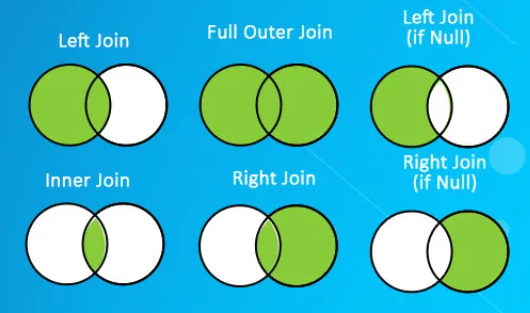

>#### 4.1 inner (interior):

Solo devuelve las filas que tienen coincidencia en ambos DataFrames.
Ejemplo: Si un cliente está en ambos DataFrames, se muestra. Si está en uno pero no en el otro, se excluye.

In [ ]:
df_stock_code.head()

,InvoiceNo,StockCode,Quantity,UnitPrice
0,536365,85123A,6,2.55
1,536365,71053,6,3.39
2,536365,84406B,8,2.75
3,536365,84029G,6,3.39
4,536365,84029E,6,3.39


In [ ]:
# Revisar valores unicos en df_invoice
# Ej: conteo de unicos y conteo general

def testeo_valores_unicos(df, columna):
  dataframe = df.dropna(subset=[columna])

  conteo_general = dataframe[columna].count()
  conteo_unicos = dataframe[columna].nunique()

  try:
    assert conteo_general == conteo_unicos
    print(f'Test de la columna {columna} superado')
  except AssertionError:
    raise AssertionError(f'Test de la columna {columna} fallido')

In [ ]:
testeo_valores_unicos(df_invoice, 'InvoiceNo')
df_invoice.head(2)

Test de la columna InvoiceNo superado


,InvoiceNo,Country
0,536365,United Kingdom
7,536366,United Kingdom


In [ ]:
# Ej 2 datos duplicados
df_invoice['InvoiceNo'].value_counts(ascending=False)

,count
InvoiceNo,
581538,1
581516,1
581514,1
581502,1
581501,1
...,...
536369,1
536368,1
536367,1


In [ ]:
df_stock_code.shape

(527387, 4)

In [ ]:
df_invoice.shape

(22064, 2)

In [ ]:
# pd.merge(df_stock_code, df_invoice, how='inner', on=['InvoiceNo'])

df_invoice_stock = df_stock_code.merge(df_invoice,
                                       how='inner',
                                       on=['InvoiceNo']
                                       )

print(f'El dataframe original tenía {df_stock_code.shape[0]} filas')
print(f'El dataframe nuevo tiene {df_invoice_stock.shape[0]} filas')

# Revisar función "assert" para verificar que los dataframes tengan la misma cantidad de filas

df_invoice_stock.head(2)

El dataframe original tenía 527387 filas
El dataframe nuevo tiene 527387 filas


,InvoiceNo,StockCode,Quantity,UnitPrice,Country
0,536365,85123A,6,2.55,United Kingdom
1,536365,71053,6,3.39,United Kingdom


In [ ]:
(df_invoice_stock
 .groupby(['Country'])
 .agg({'Quantity':'sum'})
 .sort_values(by=['Quantity'], ascending=False)
 .head()
 )

,Quantity
Country,
United Kingdom,4511067
Netherlands,200937
EIRE,147281
Germany,119156
France,112061


¿Las filas del dataframe original son las mismas que las del nuevo?
¿Hay más? ¿Hay menos?

>#### 4.2 left (izquierdo):

Devuelve todas las filas del DataFrame de la izquierda y las coincidencias del DataFrame derecho.
Si no hay coincidencia en el derecho, las celdas se rellenan con NaN.

In [ ]:
# Correr el código oculto en la celda de abajo

In [ ]:
# @title
df_invoice_incompleta = df_invoice[~df_invoice['Country'].isin(['Germany', 'EIRE'])]

In [ ]:
df_invoice_stock = df_stock_code.merge(df_invoice_incompleta,
                                       how='inner',
                                       on=['InvoiceNo']
                                       )

print(f'El dataframe original tenía {df_stock_code.shape[0]} filas')
print(f'El dataframe nuevo tiene {df_invoice_stock.shape[0]} filas')

df_invoice_stock.head(2)

El dataframe original tenía 527387 filas
El dataframe nuevo tiene 510477 filas


,InvoiceNo,StockCode,Quantity,UnitPrice,Country
0,536365,85123A,6,2.55,United Kingdom
1,536365,71053,6,3.39,United Kingdom


Esta vez usamos el mismo método de unión que antes 'inner', como la base de transacciones (invoice) que nos pasaron no trae algunos paises, ahora perdemos filas!

Podemos usar 'left' para mantener las filas que no coincidan

In [ ]:
df_invoice_stock = df_stock_code.merge(df_invoice_incompleta,
                                       how='left',
                                       on=['InvoiceNo']
                                       )

print(f'El dataframe original tenía {df_stock_code.shape[0]} filas')
print(f'El dataframe nuevo tiene {df_invoice_stock.shape[0]} filas')

df_invoice_stock.head(2)

El dataframe original tenía 527387 filas
El dataframe nuevo tiene 527387 filas


,InvoiceNo,StockCode,Quantity,UnitPrice,Country
0,536365,85123A,6,2.55,United Kingdom
1,536365,71053,6,3.39,United Kingdom


In [ ]:
df_invoice_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527387 entries, 0 to 527386
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   InvoiceNo  527387 non-null  object 
 1   StockCode  527387 non-null  object 
 2   Quantity   527387 non-null  int64  
 3   UnitPrice  527387 non-null  float64
 4   Country    510477 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.1+ MB


In [ ]:
# Podemos revisar las filas con valores nulos de la columna 'Country' para ver donde no encontramos coincidencias
condicion = df_invoice_stock['Country'].isnull()
# df_invoice_stock[condicion]
invoiceno_sin_pais = df_invoice_stock[condicion]['InvoiceNo'].unique()
invoiceno_sin_pais[:3]

array(['536527', '536540', '536541'], dtype=object)

¿Cómo podríamos encontrar cuáles son los países que no tenemos en este nuevo dataset?

In [ ]:
# Solución
# df_invoice.head(2)
df_invoice_incompleta.head(2)

,InvoiceNo,Country
0,536365,United Kingdom
7,536366,United Kingdom


In [ ]:
# Check de paises que no encontramos en el dataframe incompleto
condicion_tsinpais = df_invoice['InvoiceNo'].isin(invoiceno_sin_pais)

df_invoice[condicion_tsinpais]['Country'].unique()

array(['Germany', 'EIRE'], dtype=object)

In [ ]:
# Revisar por pais
# Usando sets !

set_completo = set(df_invoice['Country'])
set_paises_incompletos = set(df_invoice_incompleta['Country'])

print(set_completo.difference(set_paises_incompletos))

print(set_paises_incompletos.difference(set_completo))

{'Germany', 'EIRE'}
set()


>#### 4.3 outer (exterior):

Devuelve todas las filas de ambos DataFrames, sin importar si hay coincidencias o no.
Las celdas donde no hay coincidencia se rellenan con NaN.

In [ ]:
# correr el código de abajo para generar el dataset de costos
# y un nuevo dataset de invoice

In [ ]:
# @title
df_invoice_cost = df.copy()
df_invoice_cost['total_price'] = df['Quantity'] * df['UnitPrice']
df_invoice_cost = df_invoice_cost.groupby(['InvoiceNo']).agg({'total_price':'sum'})

def generate_random_cost(total_price):
    if total_price > 1:
        return np.random.randint(1, np.floor(total_price) + 1)
    return 0

df_invoice_cost['invoice_cost'] = df_invoice_cost['total_price'].apply(generate_random_cost)

df_invoice_cost = (df_invoice_cost
                   .drop(['total_price'], axis = 1)
                   .sample(n=int(np.round(df_invoice_cost.shape[0]*0.75,0)), random_state=11)
                   .reset_index()
                   )
df_invoice_data_2 = df.sample(n=int(np.round(df.shape[0]*0.75,0)), random_state=3312)

* df_invoice_cost


variable | rol |  descripcion
---|---|---
InvoiceNo | Identificador | Número de 6 dígitos asignado como identificador único a cada transacción. Si el código comienza con una 'c', indica que la transacción fue cancelada
invoice_cost | variable | Costo que tuvo la transacción


* df_invoice_data_2 es una muestra de la tabla original que hemos trabajado en tablas separadas anteriormente

In [ ]:
df_invoice_cost.head(2)

,InvoiceNo,invoice_cost
0,538529,366
1,573167,66


In [ ]:
df_invoice_data_2.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
407902,571913,22180,RETROSPOT LAMP,1,10/19/2011 15:29,9.95,18210.0,United Kingdom
83999,543358,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2/7/2011 14:04,5.79,NaN,United Kingdom


In [ ]:
# En este ejercicio vamos a encontrar el precio total de una transacción
# El precio total de una transacción es la suma de 'Quantity' * 'UnitPrice' por transacción
# Y lo vamos a unir con el costo total de las transacciones
# Corra la celda oculta de abajo para conocer los valores a los que debemos llegar

In [ ]:
# @title
df_invoice_data_2_total_price = df_invoice_data_2.copy()
df_invoice_data_2_total_price['total_price'] = df_invoice_data_2_total_price['Quantity'] * df_invoice_data_2_total_price['UnitPrice']
invoice_data_2_total_price = df_invoice_data_2_total_price['total_price'].sum()
invoice_data_2_total_price

invoice_total_cost =  df_invoice_cost['invoice_cost'].sum()

print(f'El precio total de las transacciones fue: {invoice_data_2_total_price:_.2f}')
print(f'El costo total de las trasacciones fue: {invoice_total_cost:_.2f}')

El precio total de las transacciones fue: 7_851_799.68
El costo total de las trasacciones fue: 3_829_952.00


In [ ]:
# Advertencia! De las transacciones alguna veces tenemos el precio y el costo, y otras veces tenemos el precio o el costo
# Vamos a experimentar usando los métodos 'inner' y 'left' para ver cómo nos da

In [ ]:
df_invoice_data_2['total_price'] = df_invoice_data_2['Quantity'] * df_invoice_data_2['UnitPrice']
df_invoice_data_2.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
407902,571913,22180,RETROSPOT LAMP,1,10/19/2011 15:29,9.95,18210.0,United Kingdom,9.95
83999,543358,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2/7/2011 14:04,5.79,NaN,United Kingdom,5.79


In [ ]:
# Usando el método inner
df_invoice_data_2_grouped = (df_invoice_data_2.groupby(['InvoiceNo']).agg({'total_price':'sum'})) # En este primera parte agrupamos el precio total por transacción

df_experimento_inner = (df_invoice_data_2_grouped
                        .merge(df_invoice_cost,
                               how='inner',
                               on=['InvoiceNo']
                               )                    # En esta le añadimos los costos de cada transacción
                        )

# Ahora sumamos la totalidad del precio y costos de las transacciones
experimento_inner_total_price = df_experimento_inner['total_price'].sum()
experimento_inner_total_cost = df_experimento_inner['invoice_cost'].sum()

print(f'La suma del precio de las transacciones es: {experimento_inner_total_price:_} usando el método "inner"')
print(f'La suma del costo de las transacciones es: {experimento_inner_total_cost:_} usando el método "inner"')

df_experimento_inner.head(2)

La suma del precio de las transacciones es: 5_798_525.052 usando el método "inner"
La suma del costo de las transacciones es: 3_800_798 usando el método "inner"


,InvoiceNo,total_price,invoice_cost
0,536365,66.18,38
1,536366,11.10,11


In [ ]:
# Ejecute la celda de abajo para ver la diferencia entre el resultado anterior y el real

In [ ]:
print('Usando el método inner:')
print(f'La diferencia en el precio total es de: {np.round(invoice_data_2_total_price - experimento_inner_total_price,2):_}')
print(f'La diferencia en el costo total es de: {invoice_total_cost - experimento_inner_total_cost:_}')

Usando el método inner:
La diferencia en el precio total es de: 2_053_274.63
La diferencia en el costo total es de: 29_154


¿Qué nos puede indicar esta diferencia?

In [ ]:
# Usando el método left
df_experimento_left = (df_invoice_data_2_grouped # En este primera parte agrupamos el precio total por transacción
                        .merge(df_invoice_cost,
                               how='left',
                               on=['InvoiceNo']
                               )                    # En esta le añadimos los costos de cada transacción
                        )

# Ahora sumamos la totalidad del precio y costos de las transacciones
experimento_left_total_price = df_experimento_left['total_price'].sum()
experimento_left_total_cost = df_experimento_left['invoice_cost'].sum()

print(f'La suma del precio de las transacciones es: {experimento_left_total_price:_.2f} usando el método "left"')
print(f'La suma del costo de las transacciones es: {experimento_left_total_cost:_} usando el método "left"')

df_experimento_left.head(2)

La suma del precio de las transacciones es: 7_851_799.68 usando el método "left"
La suma del costo de las transacciones es: 3_800_798.0 usando el método "left"


,InvoiceNo,total_price,invoice_cost
0,536365,66.18,38.0
1,536366,11.10,11.0


In [ ]:
# Ejecute la celda de abajo para ver la diferencia entre el resultado anterior y el real

In [ ]:
print('Usando el método left:')
print(f'La diferencia en el precio total es de: {np.round(invoice_data_2_total_price - experimento_left_total_price,2):_}')
print(f'La diferencia en el costo total es de: {invoice_total_cost - experimento_left_total_cost:_}')

Usando el método left:
La diferencia en el precio total es de: 0.0
La diferencia en el costo total es de: 29_154.0


In [ ]:
condicion = df_experimento_left['invoice_cost'].isna()

df_experimento_left[condicion].sort_values(by=['total_price'], ascending=False).head()

,InvoiceNo,total_price,invoice_cost
17909,574941,45626.89,NaN
18578,576365,31328.66,NaN
9467,556917,17994.23,NaN
12073,562439,16972.70,NaN
1568,539750,14619.54,NaN


¿Existe diferencia respecto a lo que obtuvimos con el método inner?

 * Recordemos el método outer: Devuelve todas las filas de ambos DataFrames, sin importar si hay coincidencias o no. Las celdas donde no hay coincidencia se rellenan con NaN.
 * En este caso es útil porque a veces tenemos precios o costos, entonces puede que en la tabla de precios existan transacciones que no existen en la de costos y viceversa

In [ ]:
# Usando el método outer
df_experimento_outer = (df_invoice_data_2_grouped # En este primera parte agrupamos el precio total por transacción
                        .merge(df_invoice_cost,
                               how='outer',
                               on=['InvoiceNo']
                               )                    # En esta le añadimos los costos de cada transacción
                        )

# Ahora sumamos la totalidad del precio y costos de las transacciones
experimento_outer_total_price = df_experimento_outer['total_price'].sum()
experimento_outer_total_cost = df_experimento_outer['invoice_cost'].sum()

print(f'La suma del precio de las transacciones es: {experimento_outer_total_price:_.2f} usando el método "outer"')
print(f'La suma del costo de las transacciones es: {experimento_outer_total_cost:_} usando el método "outer"')

La suma del precio de las transacciones es: 7_851_799.68 usando el método "outer"
La suma del costo de las transacciones es: 3_829_952.0 usando el método "outer"


In [ ]:
# Ejecute la celda de abajo para ver la diferencia entre el resultado anterior y el real

In [ ]:
print('Usando el método outer:')
print(f'La diferencia en el precio total es de: {np.round(invoice_data_2_total_price - experimento_outer_total_price,2):_}')
print(f'La diferencia en el costo total es de: {invoice_total_cost - experimento_outer_total_cost:_}')

Usando el método outer:
La diferencia en el precio total es de: 0.0
La diferencia en el costo total es de: 0.0


In [ ]:
df_experimento_outer.head()

,InvoiceNo,total_price,invoice_cost
0,536365,66.18,38.0
1,536366,11.10,11.0
2,536367,152.43,61.0
3,536368,70.05,38.0
4,536369,NaN,10.0


In [ ]:
df_experimento_outer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21821 entries, 0 to 21820
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   InvoiceNo     21821 non-null  object 
 1   total_price   21062 non-null  float64
 2   invoice_cost  16548 non-null  float64
dtypes: float64(2), object(1)
memory usage: 511.6+ KB


In [ ]:
df_experimento_outer[df_experimento_outer['total_price'].isnull()].sort_values(by='invoice_cost', ascending=False).head()

,InvoiceNo,total_price,invoice_cost
20807,579498,NaN,1894.0
644,537632,NaN,1835.0
9626,556444,NaN,1288.0
14884,567453,NaN,1107.0
5863,548913,NaN,897.0


In [ ]:
df_experimento_outer[df_experimento_outer['invoice_cost'].isnull()].sort_values(by='total_price', ascending=False).head()

,InvoiceNo,total_price,invoice_cost
18567,574941,45626.89,NaN
19250,576365,31328.66,NaN
9836,556917,17994.23,NaN
12540,562439,16972.70,NaN
1627,539750,14619.54,NaN


In [ ]:
# Proceso para restaurar el dataframe original
## df_stock_code
## df_stock_description
## df_invoice

In [ ]:
testeo_valores_unicos(df_invoice, 'InvoiceNo')

Test de la columna InvoiceNo superado


In [ ]:
df_restaurada = (df_stock_code
                 #
                 .merge(df_stock_description.drop_duplicates(subset=['StockCode']),
                          how='inner',
                          on=['StockCode'])
                 #
                 .merge(df_invoice,
                          how='inner',
                          on=['InvoiceNo']
                          )
                 )

print(df_stock_code.shape[0])
print(df_restaurada.shape[0])

df_restaurada.head(2)

527387
527387


,InvoiceNo,StockCode,Quantity,UnitPrice,Description,Country
0,536365,85123A,6,2.55,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,536365,71053,6,3.39,WHITE METAL LANTERN,United Kingdom


### 4. Concat
* El método concat de pandas se utiliza para unir o concatenar varios objetos de tipo DataFrame o Series, ya sea horizontal (por columnas) o verticalmente (por filas). Se suele usar cuando se quiere combinar datos de diferentes fuentes o fragmentos.

In [ ]:
# Ejecute la celda oculta de abajo para preparar los datos

In [ ]:
# @title
df_germany = df[df['Country']=="Germany"]
df_spain = df[df['Country']=="Spain"]

In [ ]:
# En este caso nos dan dos datasets de transacciones
# El primero, df_germany contiene las transacciones para Alemania
# El segundo, df_spain contiene las transacciones para España
# Queremos análisar estos datasets en conjunto

In [ ]:
df_germany.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662.0,Germany


In [ ]:
df_germany['Country'].value_counts()

,count
Country,
Germany,9042


In [ ]:
df_spain.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
6421,536944,22383,LUNCH BAG SUKI DESIGN,70,12/3/2010 12:20,1.65,12557.0,Spain
6422,536944,22384,LUNCH BAG PINK POLKADOT,100,12/3/2010 12:20,1.45,12557.0,Spain


In [ ]:
df_spain['Country'].value_counts()

,count
Country,
Spain,2485


In [ ]:
# Lo que debemos hacer en este caso es apilar las filas de ambos datasets y así unirlos
# El método pd.concat es útil en este caso

# En su forma más básica pd.concat funciona así:
# pd.concat([df_1, df_2]) # Lo que estamos haciendo es especificar los dos dataframes que queremos unir dentro de una lista

In [ ]:
df_spain['sobra'] = 'experimento pd concat'
df_spain.head(2)

<ipython-input-73-1841112603>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spain['sobra'] = 'experimento pd concat'


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sobra
6421,536944,22383,LUNCH BAG SUKI DESIGN,70,12/3/2010 12:20,1.65,12557.0,Spain,experimento pd concat
6422,536944,22384,LUNCH BAG PINK POLKADOT,100,12/3/2010 12:20,1.45,12557.0,Spain,experimento pd concat


In [ ]:
df_germany_spain = pd.concat([df_germany, df_spain]) # join [inner | outter]
df_germany_spain.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sobra
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662.0,Germany,NaN
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662.0,Germany,NaN


In [ ]:
 df_germany_spain.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sobra
535271,581193,23291,DOLLY GIRL CHILDRENS CUP,2,12/7/2011 17:05,1.25,17097.0,Spain,experimento pd concat
535272,581193,85232D,SET/3 DECOUPAGE STACKING TINS,1,12/7/2011 17:05,4.95,17097.0,Spain,experimento pd concat
535273,581193,22721,SET OF 3 CAKE TINS SKETCHBOOK,2,12/7/2011 17:05,1.95,17097.0,Spain,experimento pd concat
535274,581193,23241,TREASURE TIN GYMKHANA DESIGN,1,12/7/2011 17:05,2.08,17097.0,Spain,experimento pd concat
535275,581193,23247,BISCUIT TIN 50'S CHRISTMAS,1,12/7/2011 17:05,2.89,17097.0,Spain,experimento pd concat


In [ ]:
df_germany_spain['Country'].value_counts()

,count
Country,
Germany,9042
Spain,2485


### Recursos adicionales

Documentación del método pd.merge: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

Explicación del método por DataCamp: https://www.datacamp.com/tutorial/joining-dataframes-pandas

## **Créditos**
---

**Profesores:** Julian Rojas

**Corporación Universitaria de Cataluña** - *Diplomado en Big Data y Data Science*